In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from importlib import reload
plt=reload(plt)

In [2]:
df=pd.read_csv(r"C:\Users\imreh\Desktop\Tech-Intern Internship\weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


#### Exploring the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
df.describe(include="O")

,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


#### Date-Time Breaking down

In [6]:
df[["Date-Time","TZ"]]=df["Formatted Date"].str.split("+",expand=True)
df1=df.drop(columns="Formatted Date")
df1.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date-Time,TZ
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00.000,0200
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00.000,0200
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00.000,0200
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00.000,0200
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00.000,0200


In [7]:
columns_order=["Date-Time","TZ","Summary","Precip Type","Temperature (C)","Apparent Temperature (C)",
                "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Loud Cover",
                "Pressure (millibars)", "Daily Summary"]
df2=df1.reindex(columns=columns_order)
df3=df2.drop(columns="TZ")
df3.head()

,Date-Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [8]:
df3["Date-Time"]=pd.to_datetime(df3["Date-Time"])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date-Time                 96453 non-null  datetime64[ns]
 1   Summary                   96453 non-null  object        
 2   Precip Type               95936 non-null  object        
 3   Temperature (C)           96453 non-null  float64       
 4   Apparent Temperature (C)  96453 non-null  float64       
 5   Humidity                  96453 non-null  float64       
 6   Wind Speed (km/h)         96453 non-null  float64       
 7   Wind Bearing (degrees)    96453 non-null  float64       
 8   Visibility (km)           96453 non-null  float64       
 9   Loud Cover                96453 non-null  float64       
 10  Pressure (millibars)      96453 non-null  float64       
 11  Daily Summary             96453 non-null  object        
dtypes: datetime64[ns](

In [9]:
df3["Year"]=pd.DatetimeIndex(df3["Date-Time"]).year
df3["Month"]=df3["Date-Time"].dt.month_name()
df3["day"]=df3["Date-Time"].dt.day
df3.head()


,Date-Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,day
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,April,1
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,April,1
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,April,1
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,April,1
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,April,1


#### Data Analysis

* Wind Speed

In [10]:
df3["Wind Speed (km/h)"].describe()

count    96453.000000
mean        10.810640
std          6.913571
min          0.000000
25%          5.828200
50%          9.965900
75%         14.135800
max         63.852600
Name: Wind Speed (km/h), dtype: float64

In [11]:
avg_wind_Speed=pd.DataFrame(df3.groupby("Year")["Wind Speed (km/h)"].mean())
avg_wind_Speed
#=["Year","AVG. Wind Speed (km/hr"]

,Wind Speed (km/h)
Year,
2006,10.189852
2007,10.825392
2008,11.303897
2009,11.505948
2010,11.015628
2011,9.898262
2012,11.264545
2013,10.969389
2014,10.502473


Text(0.5, 1.0, 'Average wind speed over the yeears')

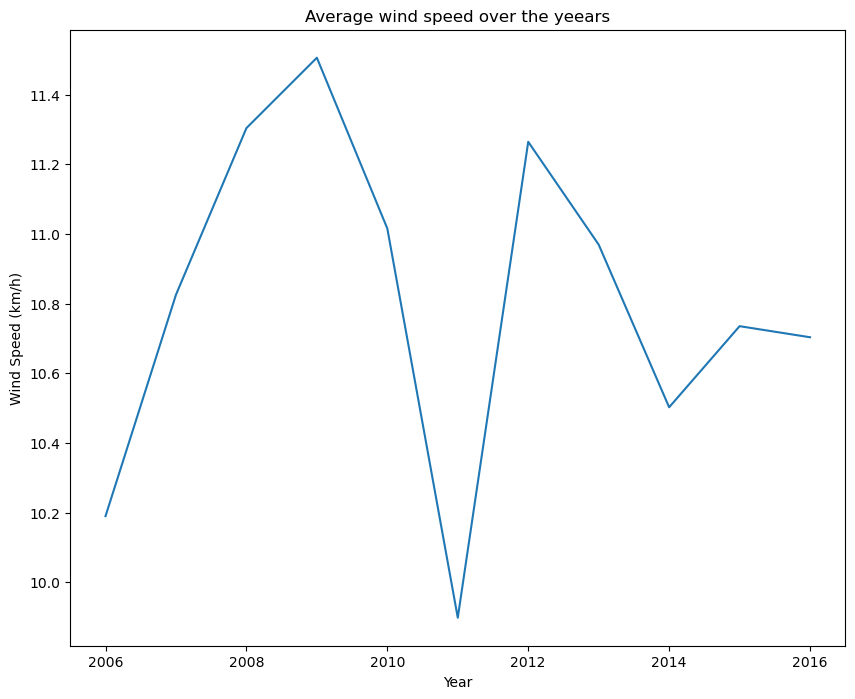

In [12]:
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x=avg_wind_Speed.index,y=avg_wind_Speed["Wind Speed (km/h)"])
plt.title("Average wind speed over the yeears")

In [13]:
month_avg_wind_Speed=pd.DataFrame(df3.groupby("Month")["Wind Speed (km/h)"].mean())
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_wind_speed=month_avg_wind_Speed.reindex(index=order)
monthly_wind_speed

,Wind Speed (km/h)
Month,
January,11.512816
February,12.185543
March,13.405461
April,11.893094
May,10.959337
June,9.626471
July,9.639907
August,8.933431
September,9.621813


Text(0.5, 1.0, 'Monthly Average wind speed over the yeears')

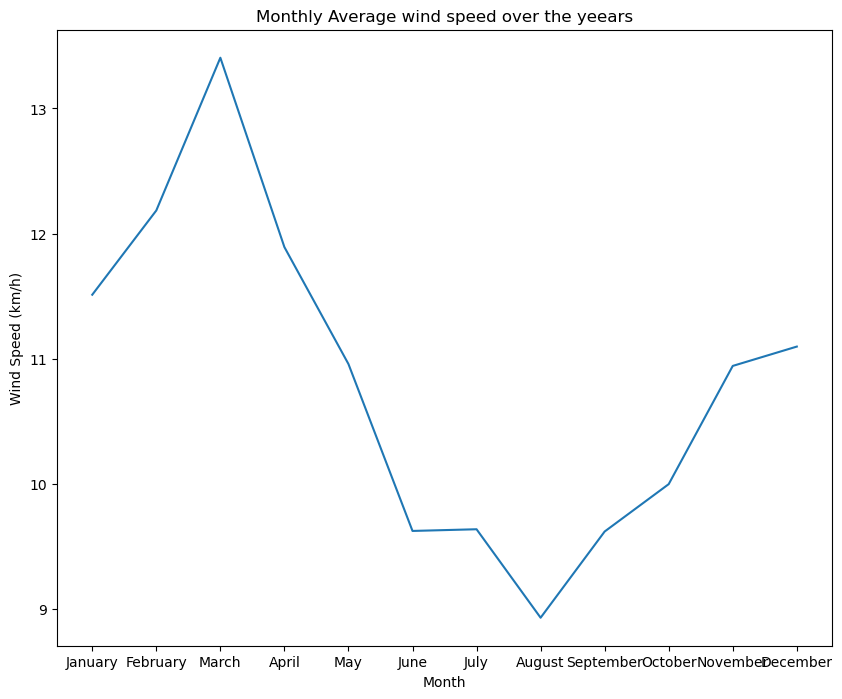

In [14]:
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x=monthly_wind_speed.index,y=monthly_wind_speed["Wind Speed (km/h)"])
plt.title("Monthly Average wind speed over the yeears")


* Weather condition

In [15]:
df3["Summary"].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [16]:
weather_cond=pd.DataFrame(df3.groupby("Year")["Summary"].describe(include="O").top)

weather_cond.rename(columns={"top":"most frequent weather"})

,most frequent weather
Year,
2006,Partly Cloudy
2007,Partly Cloudy
2008,Partly Cloudy
2009,Partly Cloudy
2010,Partly Cloudy
2011,Partly Cloudy
2012,Partly Cloudy
2013,Partly Cloudy
2014,Mostly Cloudy


In [17]:
m_weather_cond=pd.DataFrame(df3.groupby("Month")["Summary"].describe(include="O").top)
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
m_weather_cond.rename(columns={"top":"most frequent weather"})
monthly=m_weather_cond.reindex(index=order)
monthly


,top
Month,
January,Overcast
February,Overcast
March,Mostly Cloudy
April,Partly Cloudy
May,Partly Cloudy
June,Partly Cloudy
July,Partly Cloudy
August,Partly Cloudy
September,Partly Cloudy


* Visibility

In [18]:
month_avg_visibility=pd.DataFrame(df3.groupby("Month")["Visibility (km)"].mean())
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_visibility=month_avg_visibility.reindex(index=order)
monthly_visibility

,Visibility (km)
Month,
January,7.830584
February,8.731368
March,10.910450
April,11.784224
May,11.892754
June,11.990266
July,12.187820
August,12.455549
September,11.602874


Text(0.5, 1.0, 'Monthly visibility over the yeears')

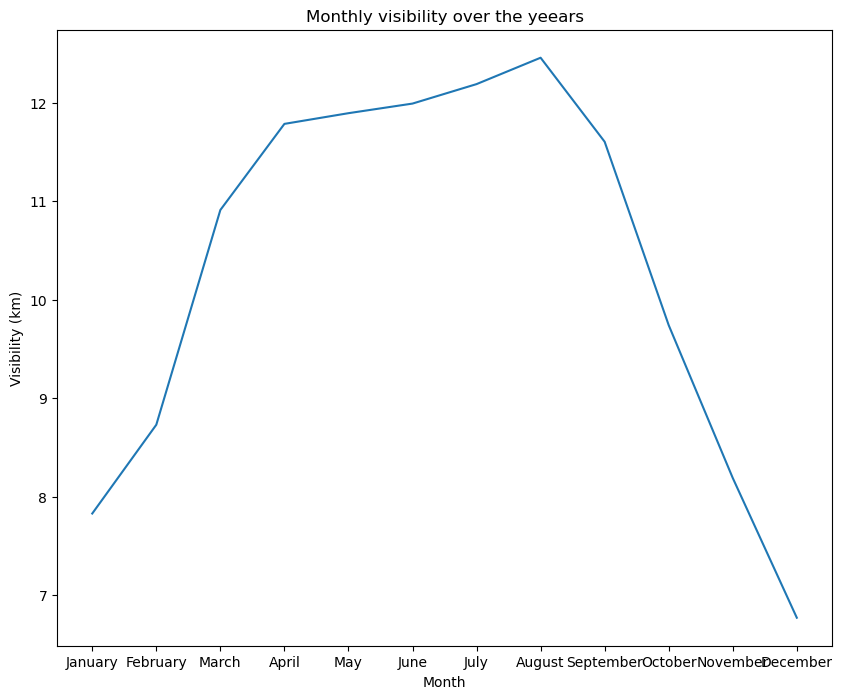

In [19]:
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x=monthly_visibility.index,y=monthly_visibility["Visibility (km)"])
plt.title("Monthly visibility over the yeears")

* Precipitation: rainy and snowy months

In [20]:
percip=pd.DataFrame(df3.groupby("Month")["Precip Type"].describe(include="O").top)
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
m_p=percip.rename(columns={"top":"Precip Type"})
monthly_percip=m_p.reindex(index=order)
monthly_percip

,Precip Type
Month,
January,rain
February,rain
March,rain
April,rain
May,rain
June,rain
July,rain
August,rain
September,rain


* Temperature

Text(0, 0.5, 'freq')

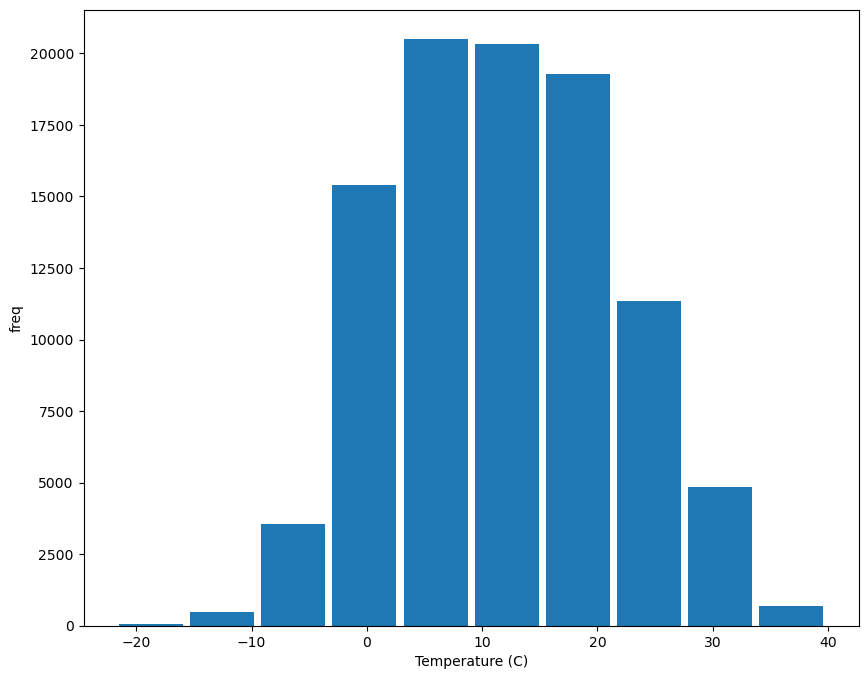

In [21]:
fig,ax=plt.subplots(figsize=(10,8))
plt.hist(df3["Temperature (C)"],bins=10,rwidth=0.9)
plt.xlabel("Temperature (C)")
plt.ylabel("freq")

In [22]:
year_avg_temp=pd.DataFrame(df3.groupby("Year")["Temperature (C)"].mean())
year_avg_temp

,Temperature (C)
Year,
2006,11.215365
2007,12.135239
2008,12.161876
2009,12.267910
2010,11.202061
2011,11.524453
2012,11.986726
2013,11.940719
2014,12.529737


Text(0.5, 1.0, 'Annual avg. temperature')

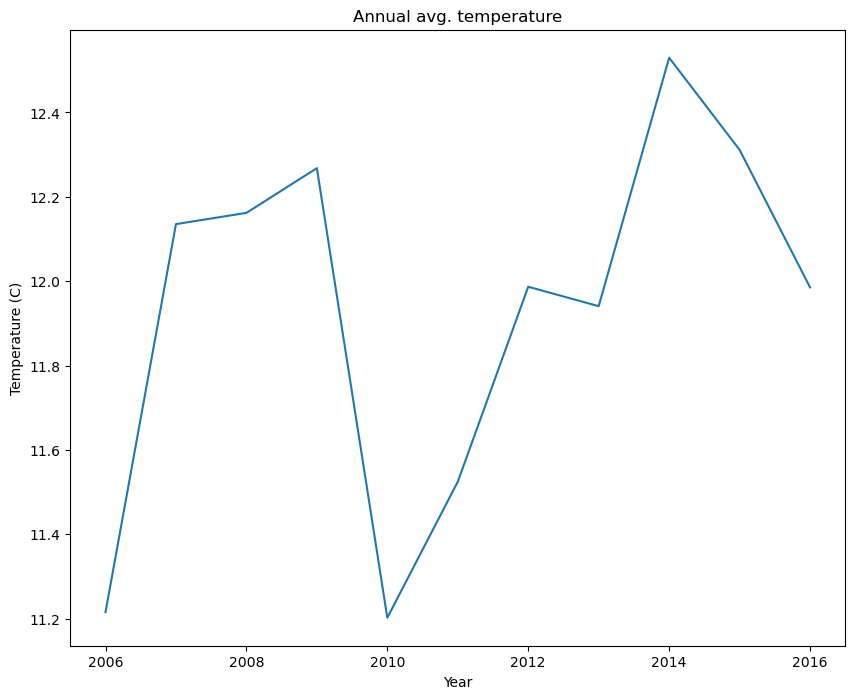

In [23]:
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x=year_avg_temp.index,y=year_avg_temp["Temperature (C)"])
plt.title("Annual avg. temperature")

In [24]:
month_temp=pd.DataFrame(df3.groupby("Month")["Temperature (C)"].mean())
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]

monthly_avg_temp=month_temp.reindex(index=order)
monthly_avg_temp

,Temperature (C)
Month,
January,0.813890
February,2.159699
March,6.906599
April,12.756417
May,16.873692
June,20.715617
July,22.963943
August,22.345031
September,17.516790


Text(0.5, 1.0, 'monthly avg. temperature')

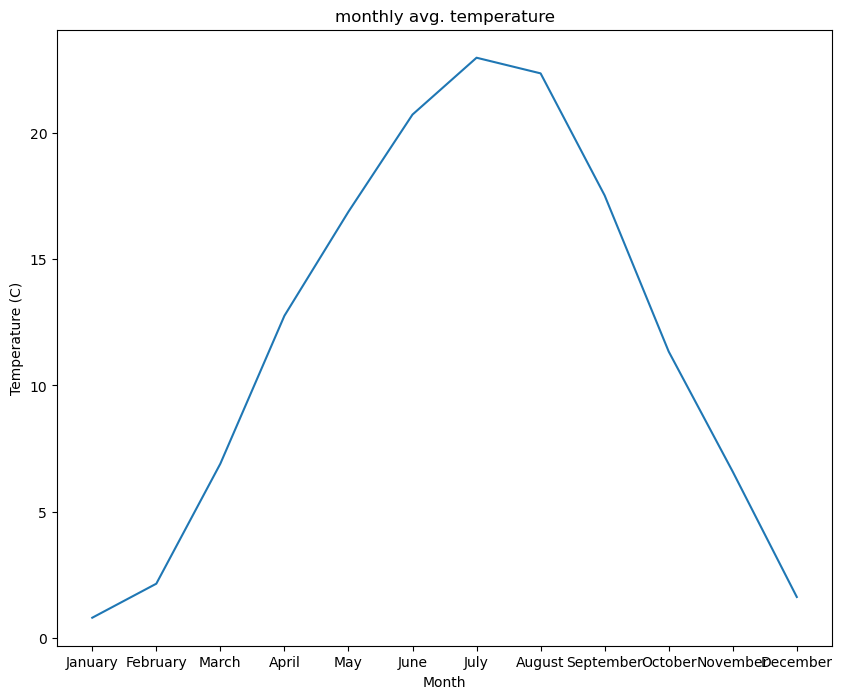

In [25]:
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x=monthly_avg_temp.index,y=monthly_avg_temp["Temperature (C)"])
plt.title("monthly avg. temperature")

* Correlation

In [26]:
df4=df3.drop(columns=["Year","day","Loud Cover"])
d_corr=df4.corr()
d_corr

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


Text(0.5, 1.0, 'correlations heat map')

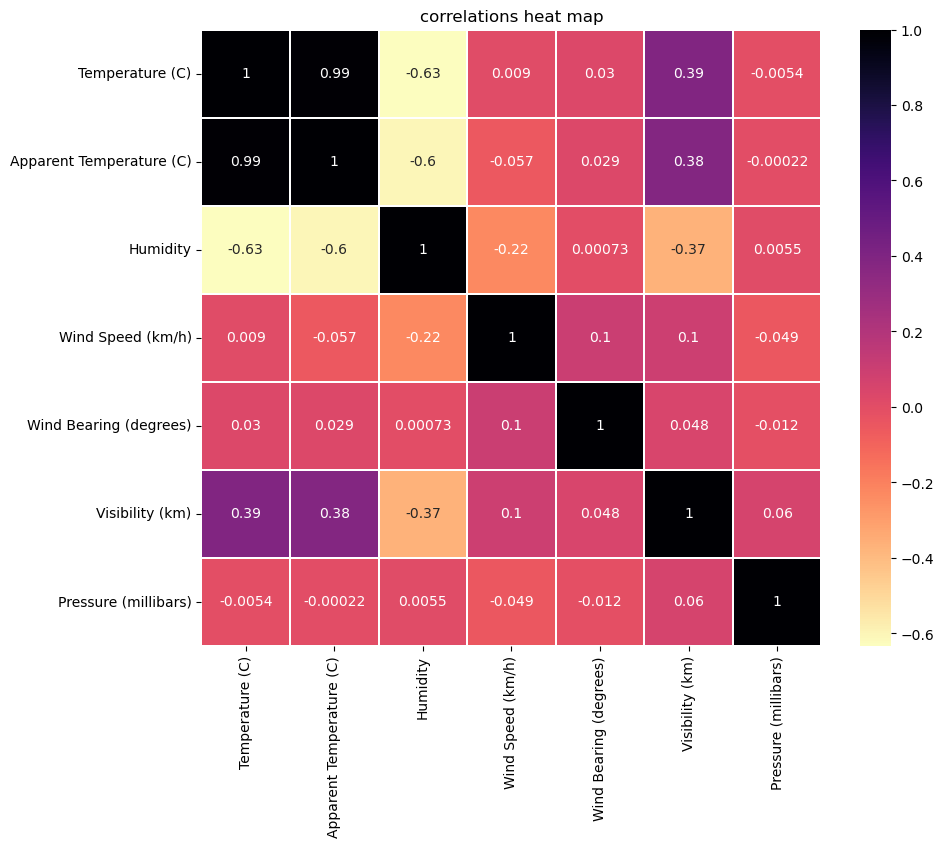

In [27]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(d_corr,annot=True,cmap='magma_r',linewidths=0.2)
plt.title("correlations heat map")
